In [1]:
import skimage.data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Get sample image

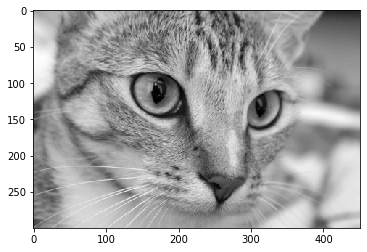

In [2]:
img = skimage.data.chelsea()
img = skimage.color.rgb2gray(img)
plt.imshow(img, cmap='gray')

## Padding

In [3]:
def pad(X, before=2, after=2):
    return np.pad(X, (before, after))

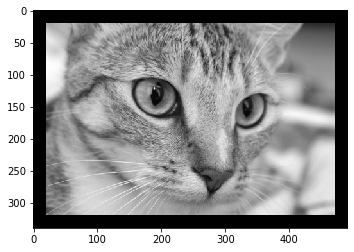

In [4]:
img_padded = pad(img, 20, 20)
plt.imshow(img_padded, cmap='gray')

## Convolution

In [5]:
def conv(X, conv_filter=None, stride=1, padding='same'):
    """
    @param padding: 'valid' (no padding), 'same' also called zero padding
    """
    assert len(X.shape) == 2, 'Only a 2D greyscale for now, no batches!'
    if not conv_filter:
        conv_filter = np.array([
            [-1, -1, -1],
            [-1, 8, -1],
            [-1, -1, -1],
        ])
    assert conv_filter.shape[0] == conv_filter.shape[1], 'Kernel must be square!'
    if padding == 'same':
        pad_size = (conv_filter.shape[0]-1)//2
        X = pad(X, before=pad_size, after=pad_size)
    H = X.shape[0]
    W = X.shape[1]
    nH = ((H-conv_filter.shape[0])//stride) + 1
    nW = ((W-conv_filter.shape[0])//stride) + 1
    img_pool = np.zeros((nH, nW))
    for h in range(nH):
        for w in range(nW):
            h_start = h*stride
            h_end = h_start + conv_filter.shape[0]
            w_start = w*stride
            w_end = w_start + conv_filter.shape[0]
            patch = X[h_start:h_end, w_start:w_end]
            img_pool[h:h+conv_filter.shape[0],w:w+conv_filter.shape[0]] = np.sum(patch * conv_filter)
    return img_pool

Original image shape: (300, 451)
Conv without pad image shape: (298, 449)
Conv with pad image shape: (300, 451)


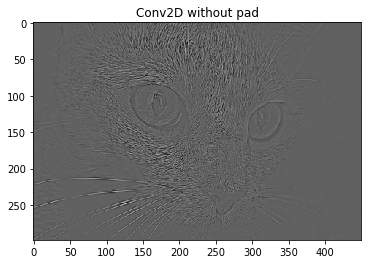

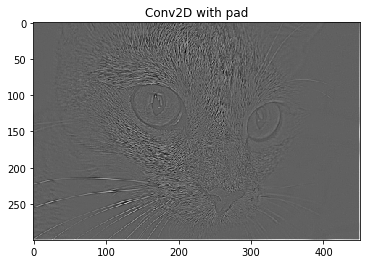

In [6]:
print('Original image shape:', img.shape)

img_conv = conv(img, stride=1, padding='valid')
print('Conv without pad image shape:', img_conv.shape)
plt.figure()
plt.title('Conv2D without pad')
plt.imshow(img_conv, cmap='gray')

img_conv = conv(img, stride=1, padding='same')
print('Conv with pad image shape:', img_conv.shape)
plt.figure()
plt.title('Conv2D with pad')
plt.imshow(img_conv, cmap='gray')

## Pooling

In [7]:
def pool(X, filter_size=3, stride=3, mode='max'):
    assert len(X.shape) == 2, 'Only a 2D greyscale for now, no batches!'
    H = X.shape[0]
    W = X.shape[1]
    nH = ((H-filter_size)//stride) + 1
    nW = ((W-filter_size)//stride) + 1
    img_pool = np.zeros((nH, nW))
    for h in range(nH):
        for w in range(nW):
            h_start = h*stride
            h_end = h_start + filter_size
            w_start = w*stride
            w_end = w_start + filter_size
            patch = X[h_start:h_end, w_start:w_end]
            img_pool[h,w] = np.max(patch) if mode=='max' else np.average(patch)
    return img_pool

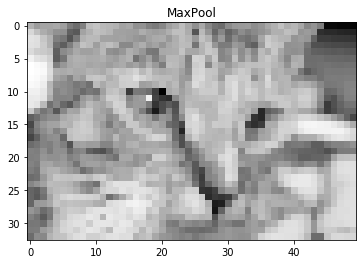

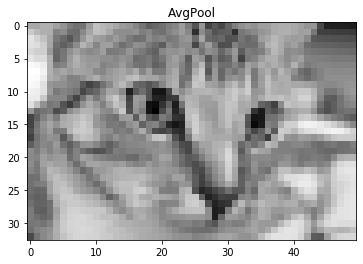

In [8]:
img_maxpool = pool(img, mode='max', filter_size=9, stride=9)
img_avgpool = pool(img, mode='avg', filter_size=9, stride=9)

plt.figure()
plt.title('MaxPool')
plt.imshow(img_maxpool, cmap='gray')
plt.figure()
plt.title('AvgPool')
plt.imshow(img_avgpool, cmap='gray')

## Butterworth Filter

In [9]:
from scipy.signal import butter,filtfilt

def butter_lowpass_filter(data, cutoff=2, fs=50.0, order=2):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

(300, 451)
(300, 451)


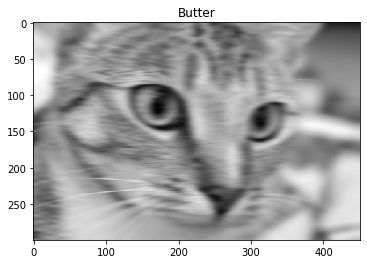

In [10]:
img_butter = butter_lowpass_filter(img)
print(img.shape)
print(img_butter.shape)
plt.title('Butter')
plt.imshow(img_butter, cmap='gray')

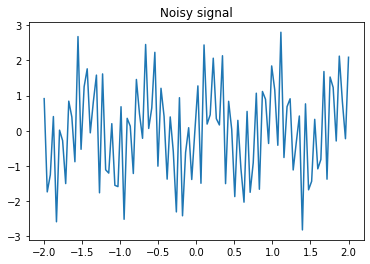

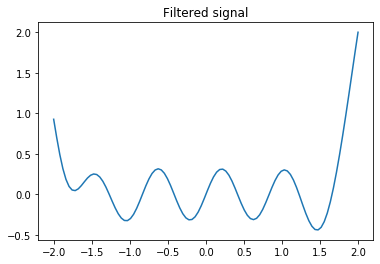

In [11]:
t = np.linspace(-2,2,100)
sig = np.sin(1.2*2*np.pi*t)
noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
plt.title('Noisy signal')
plt.plot(t, sig+noise)
plt.figure()
plt.title('Filtered signal')
plt.plot(t, butter_lowpass_filter(sig+noise))